# Trabajo práctico 3

**Consigna**:
Implementar una notebook para generar imágenes a partir de texto (txt2img) utilizando un modelo open source.

**Recomendaciones**:
- Utilizar modelo de Hugging Face.
- Utilizar una instancia de Colab con GPU.
- No es relevante la performance del modelo.

**Entregables**: Link a la notebook de acceso público.

**Objetivo**: Aprender a buscar e instanciar modelos multimodales de manera simple y rápida.

### Resolución

1. Buscar el modelo:
En Hugging Face al seleccionar la pestaña de modelos, se buscó uno para poder convertir de texto a imágen. El modelo seleccionado es AAM_XL_AnimeMix:

https://huggingface.co/Lykon/AAM_XL_AnimeMix

2. Crear un token de Hugging Face.

3. Usar el código de ejemplo.

El modelo AAM_XL_AnimeMix está basado en stabilityai/stable-diffusion-xl-base-1.0, un modelo de Stable Diffusion, pero con un fine tuning de anime.


In [3]:
# Instalar librerías
!pip install diffusers transformers accelerate


In [4]:
# Cargar la key de Hugging Face
from huggingface_hub import login
from google.colab import userdata
hf_key = userdata.get('HF_KEY')

login(hf_key)

In [5]:
# Descargar modelo
from diffusers import AutoPipelineForText2Image, DEISMultistepScheduler
import matplotlib.pyplot as plt
import torch

pipe = AutoPipelineForText2Image.from_pretrained('Lykon/AAM_XL_AnimeMix', torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DEISMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### Imágenes generadas

Token indices sequence length is longer than the specified maximum sequence length for this model (85 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['city that extends endlessly to the horizon.']
Token indices sequence length is longer than the specified maximum sequence length for this model (85 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['city that extends endlessly to the horizon.']


  0%|          | 0/25 [00:00<?, ?it/s]

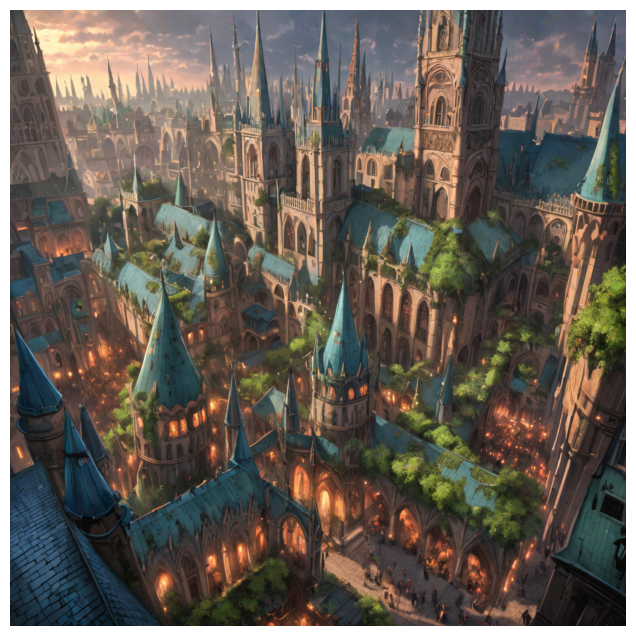

In [6]:
# Promp para generar la imágen
prompt = (
    "A sprawling cityscape of Ravnica, filled with towering gothic and baroque spires, "
    "ornate stonework covered in vines and moss, glowing magical lights illuminating the streets, "
    "crowded markets bustling with fantastical creatures, aerial walkways between buildings, "
    "and a mysterious magical haze in the air. Detailed background, cinematic shot, vibrant colors, "
    "and a sense of grandeur and mystery. A city that extends endlessly to the horizon."
)

# Generar la imagen
generator = torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=25).images[0]

# Mostrar la imagen
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.show()

  0%|          | 0/25 [00:00<?, ?it/s]

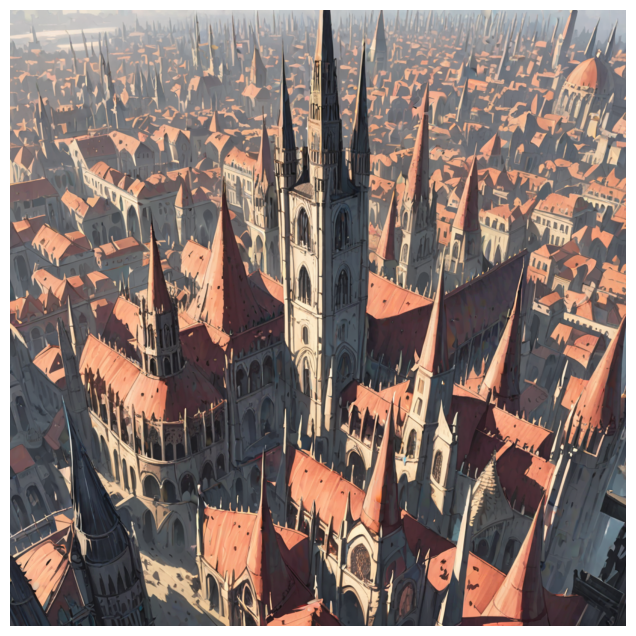

In [7]:
# Promp para generar la imágen
prompt = (
    "A sprawling cityscape of Ravnica, filled with towering gothic and baroque spires"
)

# Generar la imagen
generator = torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=25).images[0]

# Mostrar la imagen
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.show()

  0%|          | 0/25 [00:00<?, ?it/s]

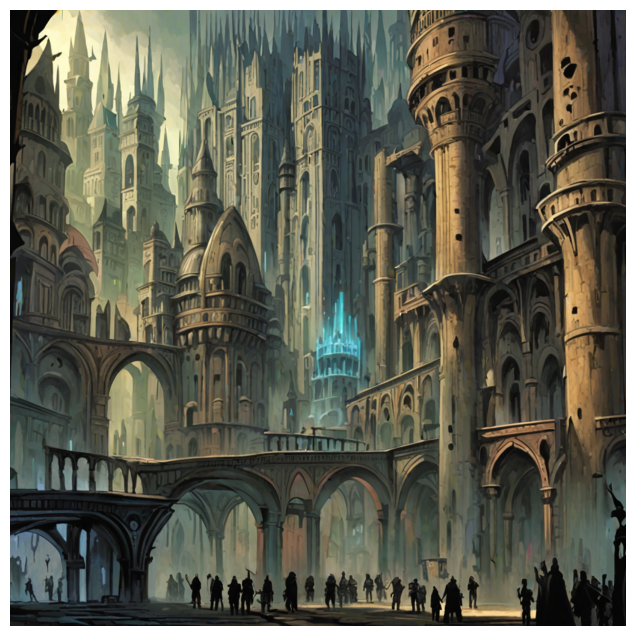

In [9]:
# Promp para generar la imágen
prompt = (
    "Ravnica undercity"
)

# Generar la imagen
generator = torch.manual_seed(0)
image = pipe(prompt, num_inference_steps=25).images[0]

# Mostrar la imagen
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.show()